# Movie Recommendation System

In [1]:
# Libraries for data file processing 
import os

# libraries for special vizualization 
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

# Essential librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Settings for visualization
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

## Data Preprocessing

**Summary:**
These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

In [3]:
# DAT file declaration - Ratings data 
rating_dat_file = 'ratings.dat'

# Read the Ratings File
ratings_data = pd.read_csv(os.path.join("dat_files", rating_dat_file), sep='::', engine='python', encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

print("Loading.. ", len(ratings_data))

Loading..  1000209


In [4]:
# DAT file declaration - Movies data 
movies_dat_file = 'movies.dat'

# Read the Movies File
movies_data = pd.read_csv(os.path.join("dat_files", movies_dat_file), sep='::', engine='python', encoding='latin-1',
                    names=["movie_id", "title", "genres"])

print("Loading.. ", len(movies_data))

Loading..  3883


In [5]:
# DAT file declaration - Users data 
users_dat_file = 'users.dat'

# Read the Users File
users_data = pd.read_csv(os.path.join("dat_files", users_dat_file), sep='::', engine='python', encoding='latin-1',
                    names=["user_id", "gender", "age", "occupation", "zipcode"])

print("Loading.. ", len(users_data))
print()
# Displaying the dataset
print("Current Users dataframe that is numerically encoded: ")
users_data.head()

Loading..  6040

Current Users dataframe that is numerically encoded: 


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


It can be seen from the above users dataframe that the occupation feature is numericaly encoded and the age is categorized as mentioned below:

- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [6]:
# Categorizing the age and occupation columns based on the information provided above, dictinary data structure is used 
# for key value pairs
age_category = { 1: "Under 18", 
                18: "18-24", 
                25: "25-34", 
                35: "35-44", 
                45: "45-49", 
                50: "50-55", 
                56: "56+"}

occupation_category = {0: "other or not specified",
                       1: "academic/educator",
                       2: "artist", 
                       3: "clerical/admin",
                       4: "college/grad student", 
                       5: "customer service", 
                       6: "doctor/health care",
                       7: "executive/managerial", 
                       8: "farmer", 
                       9: "homemaker", 
                       10: "K-12 student", 
                       11: "lawyer",
                       12: "programmer", 
                       13: "retired", 
                       14: "sales/marketing", 
                       15: "scientist", 
                       16: "self-employed",
                       17: "technician/engineer", 
                       18: "tradesman/craftsman", 
                       19: "unemployed", 
                       20: "writer"}

# Creating new cloumns with updated values/category info using lambda function on each datapoint for both features
users_data['age_group'] = users_data['age'].apply(lambda x: age_category[x])
users_data['occupation'] = users_data['occupation'].apply(lambda x: occupation_category[x])

# Resultant dataframe 
print("Processed dataframe: ")
users_data.head()

Processed dataframe: 


,user_id,gender,age,occupation,zipcode,age_group
0,1,F,1,K-12 student,48067,Under 18
1,2,M,56,self-employed,70072,56+
2,3,M,25,scientist,55117,25-34
3,4,M,45,executive/managerial,02460,45-49
4,5,M,25,writer,55455,25-34


#### Saving data into respective csv files

In [7]:
# Creating a csv file to save rating.csv
ratings_data.to_csv("ratings_data.csv", sep='\t', header=True, encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp'])

print("rating_data.csv saved in directory..")

rating_data.csv saved in directory..


In [8]:
# Creating a csv file to save movies.csv
movies_data.to_csv("movies_data.csv", sep='\t', header=True, encoding='latin-1', 
               columns=["movie_id", "title", "genres"])

print("movies_data.csv saved in directory..")

movies_data.csv saved in directory..


In [9]:
# Creating a csv file to save users.csv
users_data.to_csv("users_data.csv", sep='\t', header=True, encoding='latin-1', 
               columns=["user_id", "gender", "age", "occupation", "zipcode"])

print("users_data.csv saved in directory..")

users_data.csv saved in directory..


# Exploratory Data Analysis

In [10]:
# Above datasets in dictionary  
data_list = {"Movies dataset: ":movies_data,"Ratings dataset: ": ratings_data,"Users dataset: ": users_data}

# Iterating over the abpve dictionary for getting the data name and dataset pairs for displaying 
for key, value in data_list.items():
    print(key)
    print(value.head())
    print()
    print(value.info())
    print("*******************************************************************************************************************")

Movies dataset: 
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
*******************************************************************************************************************
Ratings dataset: 
   user_id  movie_id  rating

**Observation**: From the above dataframes we can see that we do not have null values in any, however we do have some features like timestamp and age in ratings and users dataset respectively which can be dropped. Year and genere info can be pulled from the features in movies dataset where the generes for each movie is delimited by pipes. Apprently the pincode information that is available in users dataset seems interesting to play with.

### Data cleaning - 1

In [11]:
# Merging datasets as a single dataframe
lens_data = pd.merge(pd.merge(ratings_data,users_data), movies_data)

# Pulling year information and adding as a new column 
movie_release_year_string = lens_data["title"].apply(lambda x: x.split(" ")[-1][1:-1])
movie_release_year = movie_release_year_string.apply(lambda x: int(x))

lens_data["movie_release_year"] = movie_release_year

# Cleaning title feature by removing the year String
lens_data["movie_title"] = lens_data["title"].apply(lambda x: x.split("(")[0])

# Dropping the features that are not required
lens_data.drop(["timestamp","age","title"],axis=1,inplace=True)

# Re-ordering the columns
lens_data = lens_data[["movie_id", "movie_title", "movie_release_year",
           "genres","rating", "user_id", "gender",
           "age_group","occupation", "zipcode"]]

# Resultant dataframe
lens_data.head()

,movie_id,movie_title,movie_release_year,genres,rating,user_id,gender,age_group,occupation,zipcode
0,1193,One Flew Over the Cuckoo's Nest,1975,Drama,5,1,F,Under 18,K-12 student,48067
1,1193,One Flew Over the Cuckoo's Nest,1975,Drama,5,2,M,56+,self-employed,70072
2,1193,One Flew Over the Cuckoo's Nest,1975,Drama,4,12,M,25-34,programmer,32793
3,1193,One Flew Over the Cuckoo's Nest,1975,Drama,4,15,M,25-34,executive/managerial,22903
4,1193,One Flew Over the Cuckoo's Nest,1975,Drama,5,17,M,50-55,academic/educator,95350


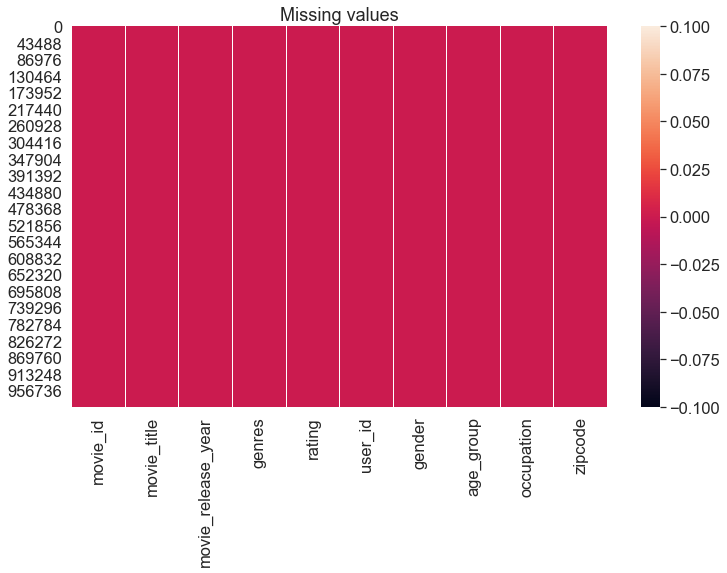

In [12]:
# Checking for missing data
sns.heatmap(lens_data.isnull()).set_title("Missing values")
plt.show()

**Observation:** No missign values found in the above heatmap

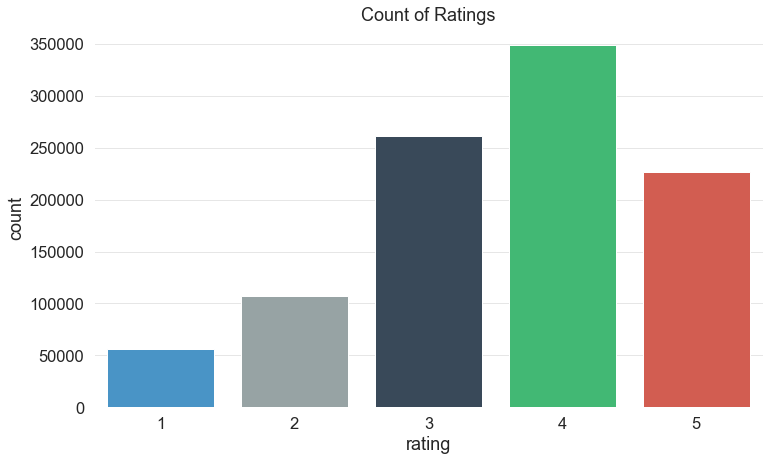

,Percentage breakup of Ratings
Rating 1,5.616
Rating 2,10.753
Rating 3,26.114
Rating 4,34.890


In [13]:
# Histogram of ratings data
sns.countplot(x=lens_data.rating, data=lens_data)
plt.title("Count of Ratings")

# To display the plot
plt.show()

# Percentage distribuion of ratings data
ratings_value_counts = round(lens_data["rating"].value_counts(normalize = True)*100,3)
rating_4 = ratings_value_counts[4]
rating_3 = ratings_value_counts[3]
rating_2 = ratings_value_counts[2]
rating_1 = ratings_value_counts[1]

pd.DataFrame({"Percentage breakup of Ratings":{"Rating 4": rating_4,
                         "Rating 3": rating_3,
                         "Rating 2": rating_2,
                         "Rating 1": rating_1,}})

**Observation:** We can see that the highest rating provided by the public is 4 and that is the most popular rating of all other ratings which is almost 35% of total count of ratings obtained from the public

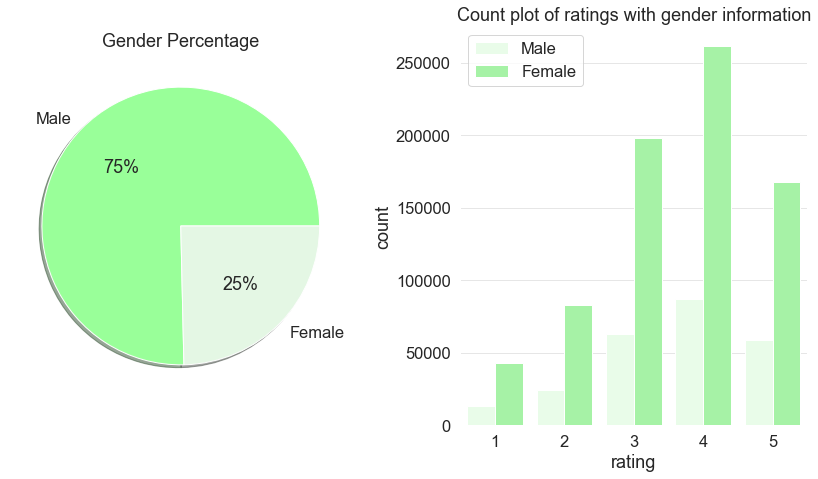

In [14]:
# Pie chart for different classes 
plt.subplot(1,2,1)
classes = ['Male', 'Female']
colors_list = ['#99ff99','#e4f7e4']
plt.pie(lens_data["gender"].value_counts(), labels = classes, autopct='%.0f%%', shadow=True, colors=colors_list)
plt.title("Gender Percentage")

# Count plot of ratings based on gender
plt.subplot(1,2,2)
classes = ['Male', 'Female']
colors = ["blue","red"]
sns.countplot(x="rating", data=lens_data, hue="gender",color="#99ff99")
plt.title("Count plot of ratings with gender information")
plt.legend(classes)

# To show the plot
plt.tight_layout() 
plt.show()


**Observation:** Above pie chart confirmes that only 25% of the ratings data comes from the females which makes us feel that the sampling is not random enough. From the available data it is seen that 4 is the most common rating given by males and females

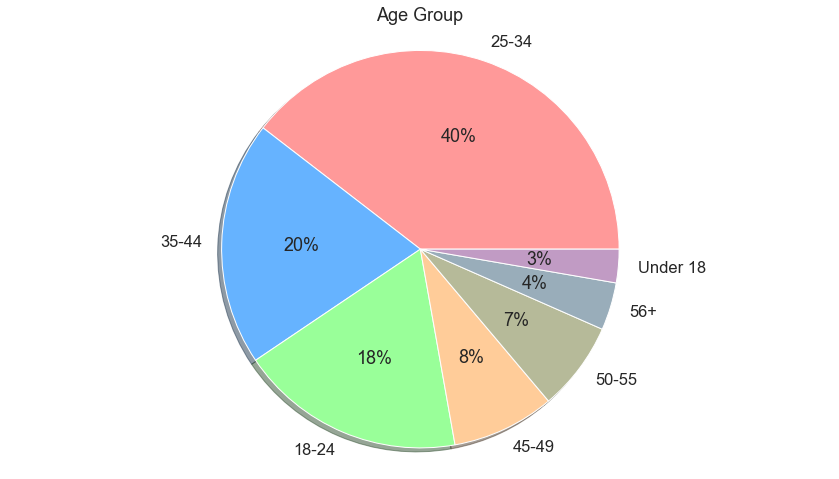

In [15]:
# Visualizing overall age
classes = ['25-34', '35-44', '18-24', '45-49', '50-55', '56+', 'Under 18']
colors_list = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#b6ba99','#99adba','#c19bc4']
fig1, ax1 = plt.subplots()
ax1.pie(lens_data["age_group"].value_counts(), autopct='%.0f%%',colors=colors_list,labels=classes, shadow=True)
plt.title("Age Group")

# To show the plot
ax1.axis('equal')
plt.tight_layout() 
plt.show()

**Observation:** Pie chart that shows the percentage of each age group present in the dataset, it is evident that people who are aged around 30 years seem to watch a lot of movies and have given provided us with more ratings 

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

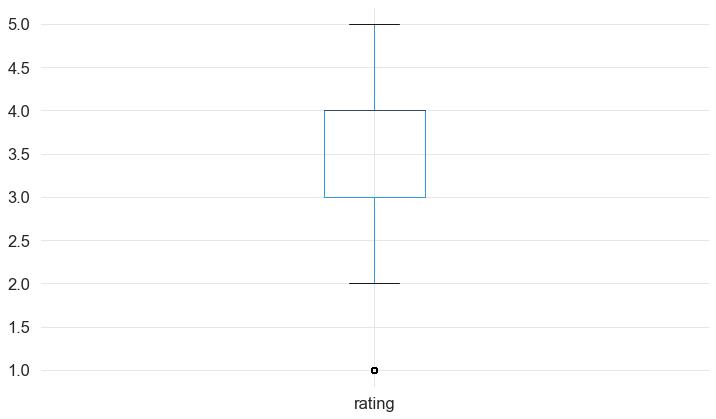

In [16]:
lens_data['rating'].plot(kind='box', subplots=True)

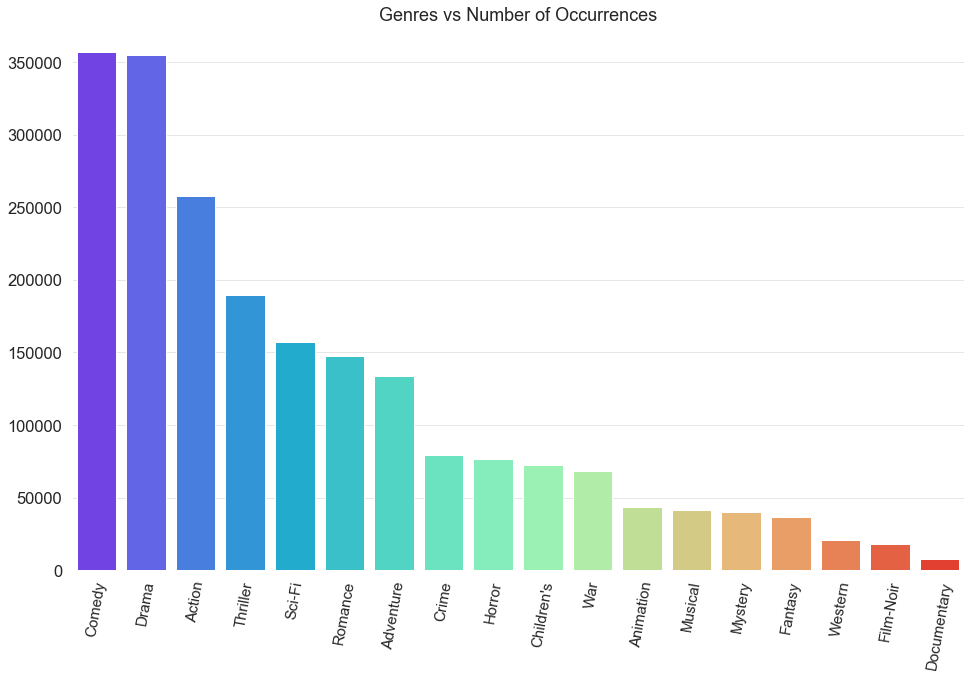

In [17]:
# Splitting the genere to have a set of it
genere_set = set()
for each_entry in lens_data['genres'].str.split('|').values:
     genere_set = genere_set.union(set(each_entry))

# Function to count the number of movies in each genres
def count_word(dataframe, target_coloumn, set_of_genere):
    keyword_count = dict()
    for s in set_of_genere: keyword_count[s] = 0
    for set_of_genere_keywords in dataframe[target_coloumn].str.split('|'):
        if type(set_of_genere_keywords) == float and pd.isnull(set_of_genere_keywords): continue
        for s in set_of_genere_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
                
    # Converst the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(lens_data, "genres", genere_set)

# Adding respective values into the axes after unpacking the key value pairs from the dictionary created
x_axis=[]
y_axis=[]
for genere,count in keyword_occurences:
    x_axis.append(genere)
    y_axis.append(count)
    
# Data viz. settings 
plt.figure(1, figsize=(16,10))
plt.xticks(rotation=80, fontsize = 15)
sns.barplot(x_axis,y_axis, palette="rainbow")
plt.title("Genres vs Number of Occurrences")
plt.show()

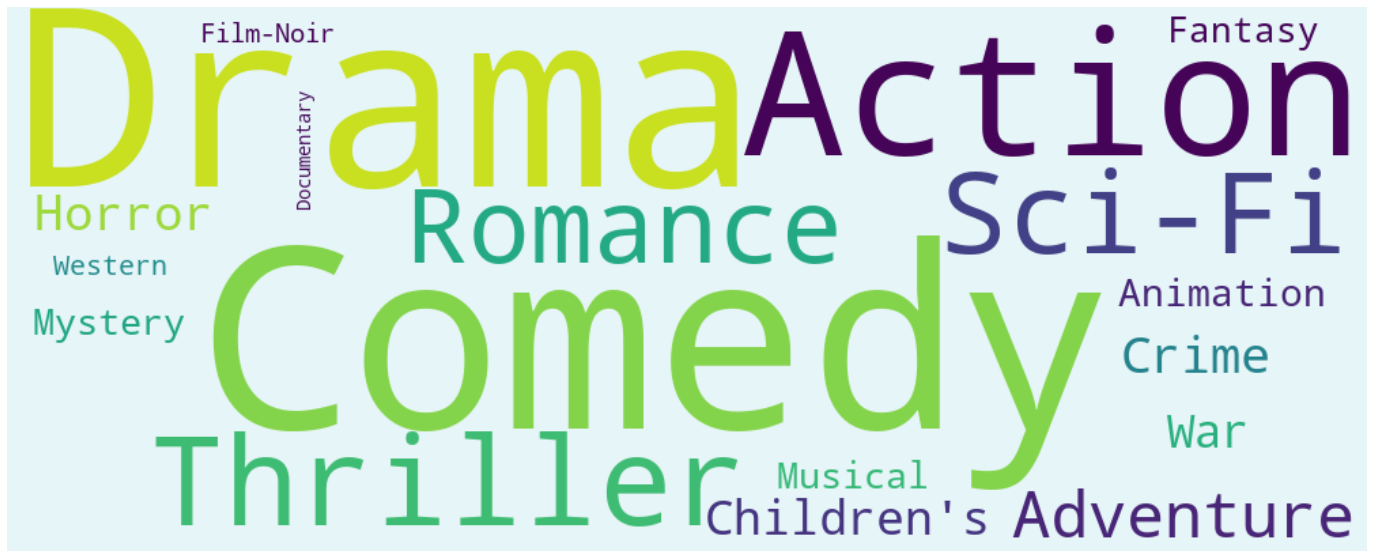

In [18]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:30]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000, height=400, background_color='#e6f5f7', max_words=100)
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(25,10))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# Do science fiction movies tend to be rated more highly than other movie genres?
# Which genres were more dominant in each decade of the range available in the dataset?
# Is there a correlation between the year of release of a movie and the genre?
# What are the top 10 most rated movies?
# What are the most popular Movie Genres among Males and Females?
# What are the Max/Min number of Movies rated by One user?
# What Genre is associated with the most Movies?
# What are the Distribution of Ratings per Genre?
# most common occupation amongst the users
# What’s the Age Distribution by Gender?
# Movies are rated on a 1-5 scale. What is the average movie rating? 
# How many of the users are artists or belong to or closely related to the film industry?
# What is the zip code of the user who rated the most movies?
# What interesting stories using the data in movielens dataset you would like to tell a studio executive/movie producer?

In [20]:
lens_data.head()

,movie_id,movie_title,movie_release_year,genres,rating,user_id,gender,age_group,occupation,zipcode
0,1193,One Flew Over the Cuckoo's Nest,1975,Drama,5,1,F,Under 18,K-12 student,48067
1,1193,One Flew Over the Cuckoo's Nest,1975,Drama,5,2,M,56+,self-employed,70072
2,1193,One Flew Over the Cuckoo's Nest,1975,Drama,4,12,M,25-34,programmer,32793
3,1193,One Flew Over the Cuckoo's Nest,1975,Drama,4,15,M,25-34,executive/managerial,22903
4,1193,One Flew Over the Cuckoo's Nest,1975,Drama,5,17,M,50-55,academic/educator,95350


In [49]:
lens_data.groupby("movie_title").size().sort_values(ascending=False)

movie_title
American Beauty                                    3428
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
                                                   ... 
Ménage                                                1
Foolish                                               1
Even Dwarfs Started Small                             1
For Ever Mozart                                       1
White Boys                                            1
Length: 3657, dtype: int64

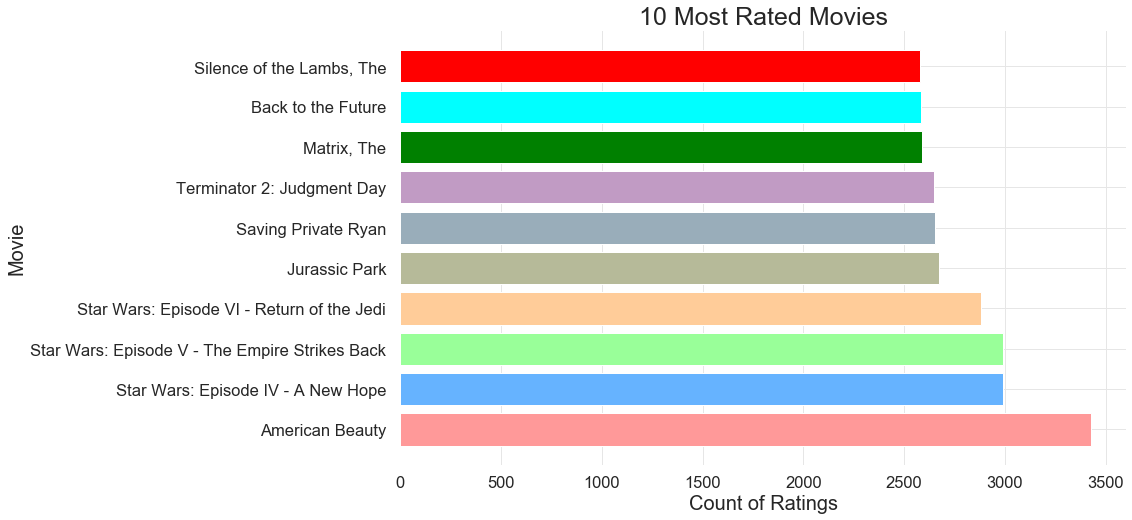

In [34]:
# Return number of rows associated to each title
top_ten_movies = lens_data.groupby("movie_title").size().sort_values(ascending=False)[:10]

# Plot the counts
plt.figure(figsize=(13, 8))

plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values,
         color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#b6ba99','#99adba','#c19bc4','green','cyan', 'red'])
plt.title("10 Most Rated Movies", fontsize=25)
plt.ylabel("Movie", fontsize=20)
plt.xlabel("Count of Ratings", fontsize=20)
plt.show()

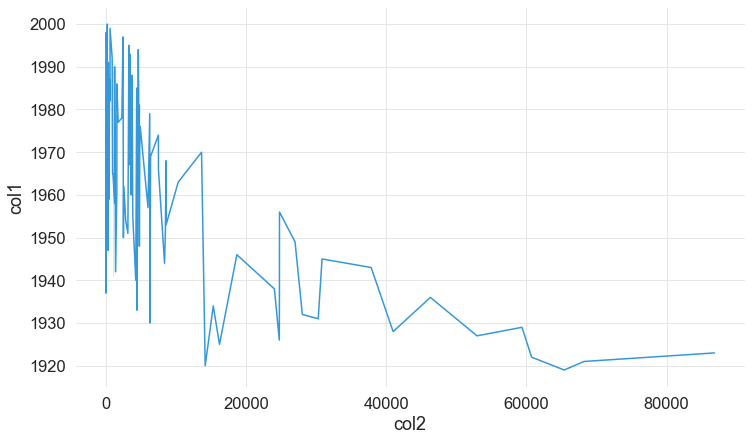

In [68]:
# Creating the year column from Movie title 

lens_data[["movie_title", "movie_release_year"]]
# return number of rows by the year 
no_of_movies_in_each_year = lens_data[["movie_title", "movie_release_year"]].groupby("movie_release_year").size()

d = {'col1': lens_data["movie_release_year"].unique(), 'col2':no_of_movies_in_each_year.values}
movie_realese_df = pd.DataFrame(data=d)

sns.lineplot(data=movie_realese_df, x="col2", y="col1")

# fig, ax = plt.subplots(figsize=(12, 5)) 
# ax.plot(year_counts.index, year_counts.values)
# ax.xaxis.set_major_locator(plt.MaxNLocator(9)) # changes the number of xticks we see
# plt.title("Number of movies per Annum", fontsize=16)
# plt.xlabel("Year", fontsize= 14)
# plt.ylabel("# of Movies Released", fontsize=14)
# plt.show()